## Лабораторная работа №1 | Вариант 6

Выполнил: 

### 1. Numpy

In [87]:
import numpy as np

1. Создайте единичную матрицу размером 3х3

In [88]:
np.matrix( [[1,2,3] for _ in range(3)], np.int64, True )

matrix([[1, 2, 3],
        [1, 2, 3],
        [1, 2, 3]])

2. Создайте матрицу 5х5 со значениями 1, 2, 3, 4 ниже диагонали

In [89]:
np.matrix( [[j == i-1 and j+1 or 0 for j in range(5)] for i in range(5)], np.int64, True )

matrix([[0, 0, 0, 0, 0],
        [1, 0, 0, 0, 0],
        [0, 2, 0, 0, 0],
        [0, 0, 3, 0, 0],
        [0, 0, 0, 4, 0]])

3. Какой выход будет у данного скрипта

```python
# Author: Jake VanderPlas

print(sum(range(5),-1))
from numpy import *
print(sum(range(5),-1))
```

In [90]:
9
10

10

4. Как найти самое часто встречаемое значение между двумя массивами? 

In [91]:
arr1 = np.array( [1, 2, 3, 4, 3] )
arr2 = np.array( [1, 2, 2, 2, 4] )

arr3 = np.concatenate( [arr1, arr2] )
vals, cnts = np.unique( arr3, return_counts=True )
print( vals[cnts==np.max(cnts)] )

[2]


5. Как игнорировать все warnings в numpy(не нужно так делать, но покажи)?

In [92]:
np.seterr(all='ignore')

{'divide': 'ignore', 'over': 'ignore', 'under': 'ignore', 'invalid': 'ignore'}

6. Реализуем функцию-генератор, которая генерирует 10 целых чисел и используем ее для построения массива

In [93]:
def generator():
    i = 0
    while i < 10:
        yield i
        i += 1

arr = np.array( [x for x in generator()] )
print(arr)

[0 1 2 3 4 5 6 7 8 9]


7. Создайте массив случайных чисел размером 10 и отсортируйте его

In [94]:
import random
rng = np.random.default_rng()
arr = np.array( [rng.integers(1444) for _ in range(10)] )

arr.sort()

print(arr)



[ 105  157  523  589  663  723  853  888  983 1248]


8. Создайте случайную матрицу 10х2 которая представляет собой декартовые координаты и преобразуйте их в полярные

In [95]:
rng = np.random.default_rng()

mx = np.array( [[rng.uniform(-3177, 7983) for _ in range(2)] for _ in range(10)], np.float64 )

for (i, obj) in enumerate(mx):
    r = np.hypot( obj[0], obj[1] )
    theta = np.arctan2( obj[1], obj[0] )
    mx[i] = [r, theta]

print(mx)

[[ 8.73885913e+03  8.54865942e-01]
 [ 7.43224792e+03  1.21801307e+00]
 [ 9.93857714e+03  6.49115879e-01]
 [ 6.58015605e+02 -6.83110757e-01]
 [ 4.45873587e+03  1.87188126e+00]
 [ 8.33094287e+03  7.96150389e-01]
 [ 8.09510490e+03 -2.69580179e-01]
 [ 2.42837349e+03 -1.87014530e+00]
 [ 2.50361340e+03 -2.03444659e+00]
 [ 4.57161536e+03  1.79867262e+00]]


9. Создайте структурированный массив который будет описывать пиксель(координату x, y и цвет r,g,b)

In [96]:
tpe = np.dtype([
    ("pos", "u4", (2,)),
    ("colour", "u1", (3,))
])

arr = np.array( [([1919, 1079], [254, 100, 22])], dtype=tpe )

print(arr)

[([1919, 1079], [254, 100,  22])]


10. Как конвертировать тип массив от float32 в int32 in place?

In [97]:
arr = np.array( [32.0, 16.0], dtype=np.float32 )

print(arr)

arr = arr.astype( np.int32 )

print(arr)

[32. 16.]
[32 16]


### 2. Pandas

Найдите ответы на вопросы или выполните действия с предложенным датасетом 

Набор данных описывает эффективность учеников в зависимости от некоторых факторов влияющих на обучение и окружение человека.

Файл: `student_perfomance.csv`

```
Hours_Studied - количество часов затраченное на обучение в неделю
Attendance - поцент посещенных занятий
Parental_Involvement - уровень участия родителей в обучении учащегося
Access_to_Resources - доступность ресурсов для обучения
Extracurricular_Activities - участие во внеклассных мероприятиях
Sleep_Hours - количество часов выделяемое на сон в день
Previous_Scores - оценка за первый экзамен
Motivation_Level - уровень мотивации
Internet_Access - доступ к интернету
Tutoring_Sessions - количество посещаемых репетиторских занятий в месяц.
Family_Income - доход семьи
Teacher_Quality - насколько качественно преподает учитель
School_Type - тип школы(частная, обычная)
Peer_Influence - влияние сверстников
Physical_Activity - физическая активность
Learning_Disabilities - наличие проблем с обучаемостью
Parental_Education_Level - уровень образования родителей
Distance_from_Home - дистанция от дома до школы
Gender - пол
Exam_Score - оценка на конечном экзамене
```

In [98]:
import pandas as pd

In [99]:
data = pd.read_csv('student_perfomance.csv')
print( data )

      Hours_Studied  Attendance Parental_Involvement Access_to_Resources  \
0                23          84                  Low                High   
1                19          64                  Low              Medium   
2                24          98               Medium              Medium   
3                29          89                  Low              Medium   
4                19          92               Medium              Medium   
...             ...         ...                  ...                 ...   
6602             25          69                 High              Medium   
6603             23          76                 High              Medium   
6604             20          90               Medium                 Low   
6605             10          86                 High                High   
6606             15          67               Medium                 Low   

     Extracurricular_Activities  Sleep_Hours  Previous_Scores  \
0                     

1. Посчитайте среднее кол-во часов уделяемое на сон студентами

In [100]:
print( data["Sleep_Hours"].dropna().mean() )

7.029060087785682


2. Сколько процентов студентов посещают внеклассовые активности?

In [101]:

print( len(data[data["Extracurricular_Activities"] == "Yes"]["Extracurricular_Activities"].dropna()) / len(data["Extracurricular_Activities"]) * 100, "%" )

59.60345088542455 %


3. Правда ли, что в среднем девушки сдают экзамены лучше, чем мужчины

In [102]:
print( len(data[(data["Gender"] == "Female") & (data["Exam_Score"] >= 50)].dropna()) > len(data[(data["Gender"] == "Male") & (data["Exam_Score"] >= 50)].dropna()) )

False


4. Выведите 25 и 75 перцентили времени сна студентов

In [103]:
print( data["Sleep_Hours"].quantile(0.25) )
print( data["Sleep_Hours"].quantile(0.75) )

6.0
8.0


5. Правда ли, что те, кто спит больше(75 перцентиль и выше) сдает экзамен лучше, чем студенты с недосыпом(25 перцентиль и меньше)

In [104]:
perc25 = data["Sleep_Hours"].quantile(0.25)
perc75 = data["Sleep_Hours"].quantile(0.75)
print( data[data["Sleep_Hours"] <= perc25]["Exam_Score"].mean() > data[data["Sleep_Hours"] >= perc75]["Exam_Score"].mean() ) # Тут не написано, что всегда

True


6. Влияет ли физическая активность на результаты экзамена?

In [105]:
max_pa = data["Physical_Activity"].max()

med = data["Exam_Score"].mean()
eps = 1 # 1 Балл туда-сюда погрешность

has_influence = False
for i in range(max_pa):
    if abs(data[data["Physical_Activity"] == i]["Exam_Score"].mean() - med) > eps: has_influence = True

print( has_influence )

False


7. Правда ли, что слуденты, чьи родители имеют высшее образование(College || Postgraduate), сдают экзамены лучше, чем остальные?

In [106]:
print( 
    data[(data["Parental_Education_Level"] == "College") | (data["Parental_Education_Level"]=="Postgraduate")]["Exam_Score"].mean() 
    > 
    data[(data["Parental_Education_Level"] != "College") & (data["Parental_Education_Level"]!="Postgraduate")]["Exam_Score"].mean() )

True


8. Как влияет участие родителей на результаты экзаменов

In [107]:
a = data[data["Parental_Involvement"] == "Low"]["Exam_Score"].mean()
b = data[data["Parental_Involvement"] == "Medium"]["Exam_Score"].mean()
c = data[data["Parental_Involvement"] == "High"]["Exam_Score"].mean()

eps = 0.5

positive = c - b > eps and c - a > eps
negative = c - b < -eps and c - a < -eps
print( positive and "Положительно\n" or "", end="" )
print( negative and "Отрицательно\n" or "", end="" )
print( not negative and not positive and "Влияние неопределено\n" or "", end="" )

Положительно


9. Правда ли, что в семьях с доходом больше среднего дети сдают экзамены лучше?

In [108]:
a = data[data["Family_Income"] == "Low"]["Exam_Score"].mean()
b = data[data["Family_Income"] == "Medium"]["Exam_Score"].mean()
c = data[data["Family_Income"] == "High"]["Exam_Score"].mean()

print( c > b and c > a )

True


10. Посчитайте долю студентов сдавших экзамен на более чем 70 баллов в семьях с низким доходом и отсутствием доступа к интернету

In [109]:
print( len(data[(data["Internet_Access"] == "No") & (data["Family_Income"] == "Low") & (data["Exam_Score"] > 70)]) / 
      len(data[(data["Internet_Access"] == "No") & (data["Family_Income"] == "Low")]) )

0.08056872037914692


### 3. Визуализация

Используя библиотеки matplotlib/sns/plotly/pandas и набор данных представленный ранее визуализируйте

1. Правда ли, что количество часов затрачиваемых на сон распределено примерно нормально?

<Axes: >

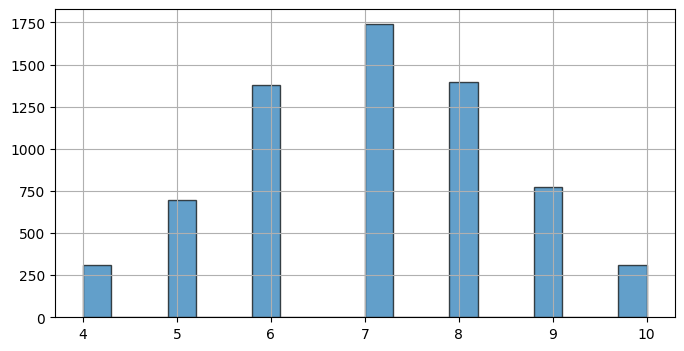

In [110]:
data["Sleep_Hours"].hist(bins=20, edgecolor="black", alpha=0.7, figsize=(8, 4)) # Да

2. Постройте гистограмму распределения количества часов затрачиваемых на обучение среди мальчиков и девочек

<Axes: >

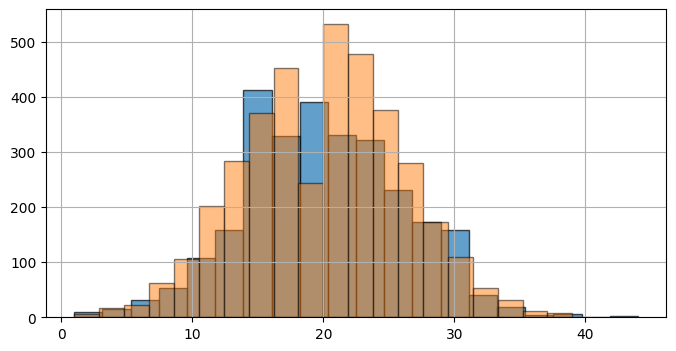

In [112]:
import matplotlib as plt

data[data["Gender"] == "Female"]["Hours_Studied"].hist(bins=20, edgecolor="black", alpha=0.7, figsize=(8, 4), )
data[data["Gender"] == "Male"]["Hours_Studied"].hist(bins=20, edgecolor="black", alpha=0.5, figsize=(8, 4), )

3. Как зависит результат конечного экзамена от результата первого экзамена

<Axes: title={'center': 'Зависимость балла от часов учёбы'}, xlabel='Previous_Scores', ylabel='Exam_Score'>

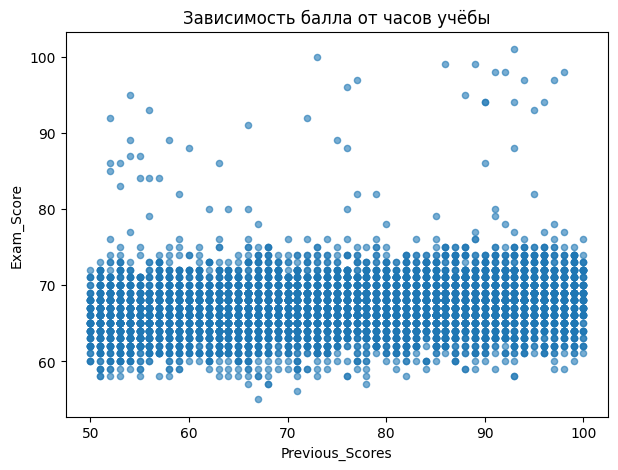

In [ ]:
data.plot.scatter(
    x="Previous_Scores",
    y="Exam_Score",
    alpha=0.6,
    figsize=(7, 5),
    title="Зависимость балла от часов учёбы"
)

4. Постройте box plot отображающий распределение количества сна детей сдавших экзамены на оценку ниже и выше 85 баллов

<Axes: title={'center': 'Sleep_Hours'}, xlabel='Exam_Score2'>

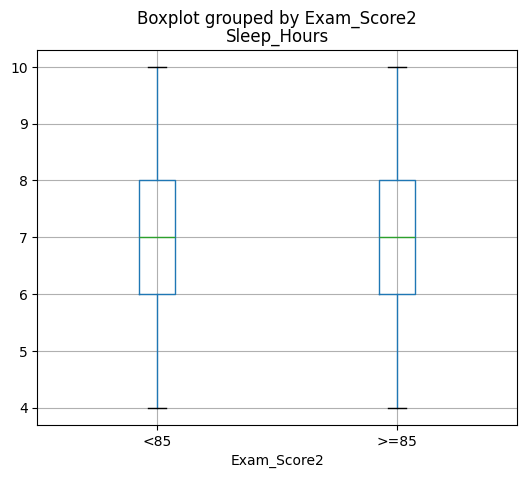

In [126]:
data["Exam_Score2"] = data["Exam_Score"].apply(
    lambda x: x < 85 and "<85" or ">=85"
)

data.boxplot(
    column="Sleep_Hours",
    by="Exam_Score2",
    figsize=(6, 5)
)

5. Правда ли, что количество посещаемых занятий с репетитором в месяц напрямую влияет на балл в конечном экзамене?

<Axes: title={'center': 'Зависимость балла от количества занятий с репетитором в месяц'}, xlabel='Exam_Score', ylabel='Tutoring_Sessions'>

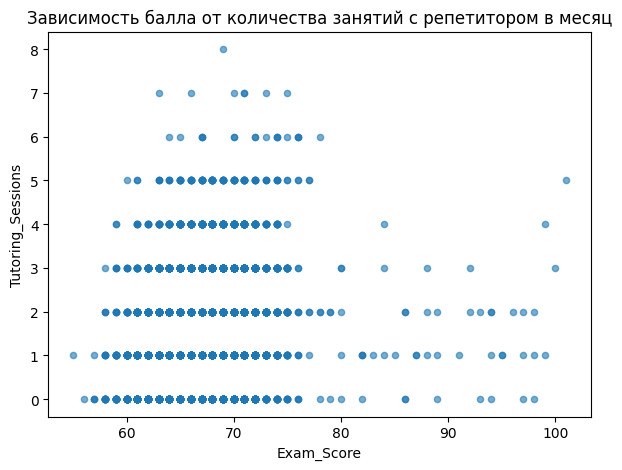

In [ ]:
data.plot.scatter(
    z="Tutoring_Sessions",
    y="Exam_Score",
    alpha=0.6,
    figsize=(7, 5),
    title="Зависимость балла от количества занятий с репетитором в месяц"
) # Нет

6. Как физическая активность влияет на успеваемость?

<Axes: title={'center': 'Зависимость балла от количества занятий с репетитором в месяц'}, xlabel='Physical_Activity', ylabel='Exam_Score'>

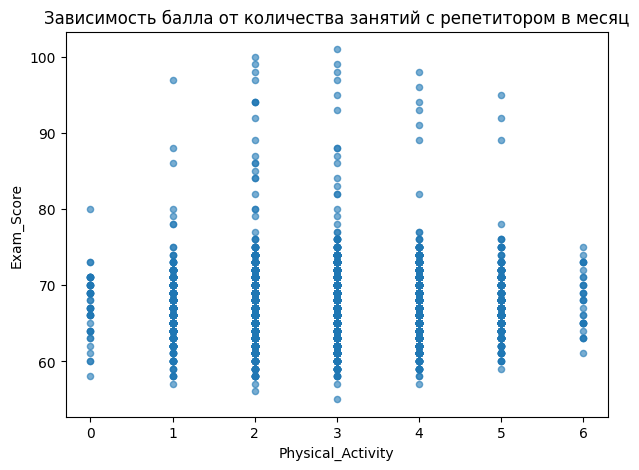

In [ ]:
data.plot.scatter(
    x="Physical_Activity",
    y="Exam_Score",
    alpha=0.6,
    figsize=(7, 5),
    title="Зависимость балла от количества занятий с репетитором в месяц"
) # Спортики и задохлики плохо справляются

7. Постройте HeatMap где ось Х - процент посещаемость, Y - количество занятий с репетитором, а Z - балл за итоговый экзамен*

\* Задание на доп. балл